Title: Regression Models

Polynomial Regression

Task 1: Apply polynomial regression to a dataset showing the relationship between age and income.

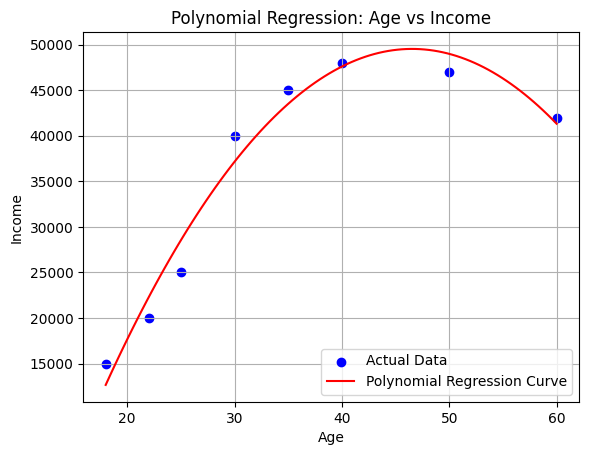

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample dataset: Age vs Income
age = np.array([18, 22, 25, 30, 35, 40, 50, 60]).reshape(-1, 1)
income = np.array([15000, 20000, 25000, 40000, 45000, 48000, 47000, 42000])

# Transform the data to include polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
age_poly = poly.fit_transform(age)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(age_poly, income)

# Predict income using the trained model
age_range = np.linspace(18, 60, 100).reshape(-1, 1)
age_range_poly = poly.transform(age_range)
income_pred = model.predict(age_range_poly)

# Plot the results
plt.scatter(age, income, color='blue', label='Actual Data')
plt.plot(age_range, income_pred, color='red', label='Polynomial Regression Curve')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Polynomial Regression: Age vs Income')
plt.legend()
plt.grid(True)
plt.show()


Task 2: Explore and visualize a higher-degree polynomial fitting compared to a simple linear regression.

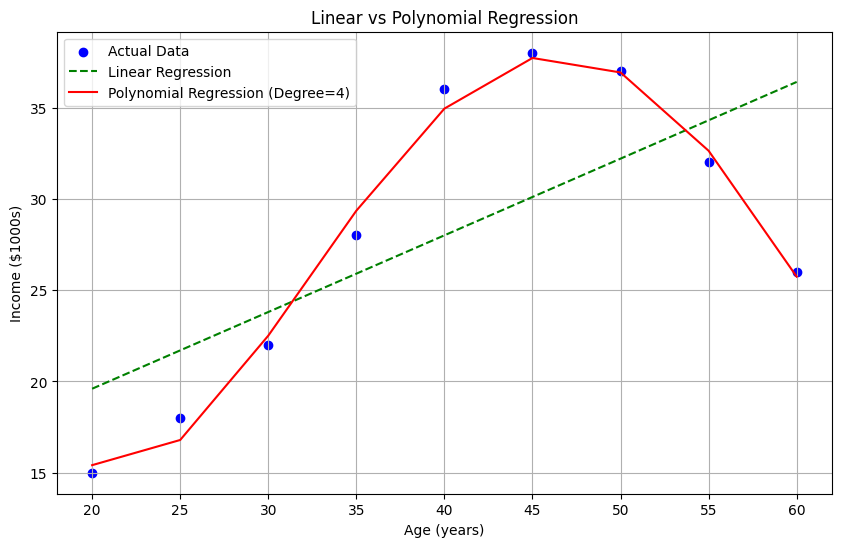

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data: Age vs Income (nonlinear relationship)
age = np.array([20, 25, 30, 35, 40, 45, 50, 55, 60]).reshape(-1, 1)
income = np.array([15, 18, 22, 28, 36, 38, 37, 32, 26])

# ---------- Linear Regression ----------
linear_model = LinearRegression()
linear_model.fit(age, income)
income_linear_pred = linear_model.predict(age)

# ---------- Polynomial Regression (Degree = 4) ----------
poly = PolynomialFeatures(degree=4)
age_poly = poly.fit_transform(age)

poly_model = LinearRegression()
poly_model.fit(age_poly, income)
income_poly_pred = poly_model.predict(age_poly)

# ---------- Plot ----------
plt.figure(figsize=(10, 6))
plt.scatter(age, income, color='blue', label='Actual Data')

# Linear regression line
plt.plot(age, income_linear_pred, color='green', linestyle='--', label='Linear Regression')

# Polynomial regression curve
plt.plot(age, income_poly_pred, color='red', label='Polynomial Regression (Degree=4)')

plt.xlabel("Age (years)")
plt.ylabel("Income ($1000s)")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()


Task 3: Dataset with cyclical patterns such as tides or circadian cycles.

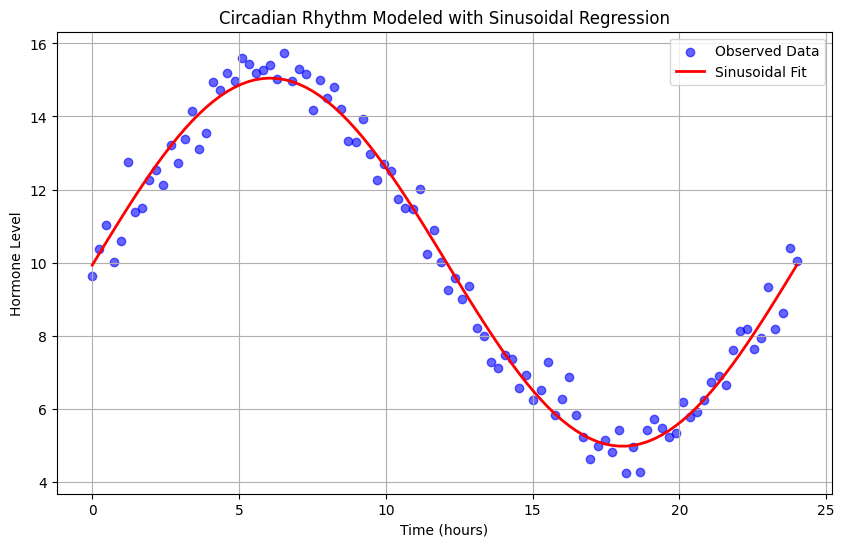

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

# Simulated cyclical data: e.g., 24-hour circadian rhythm (time vs. hormone level)
time_hours = np.linspace(0, 24, 100).reshape(-1, 1)  # 0 to 24 hours
hormone_levels = 10 + 5 * np.sin((2 * np.pi / 24) * time_hours).ravel() + np.random.normal(0, 0.5, 100)

# Add sinusoidal features: sin(2πt/24), cos(2πt/24)
sin_transformer = FunctionTransformer(lambda x: np.hstack([
    np.sin(2 * np.pi * x / 24),
    np.cos(2 * np.pi * x / 24)
]), validate=True)

# Build and fit the pipeline
model = make_pipeline(sin_transformer, LinearRegression())
model.fit(time_hours, hormone_levels)
predictions = model.predict(time_hours)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(time_hours, hormone_levels, color='blue', label='Observed Data', alpha=0.6)
plt.plot(time_hours, predictions, color='red', label='Sinusoidal Fit', linewidth=2)
plt.xlabel("Time (hours)")
plt.ylabel("Hormone Level")
plt.title("Circadian Rhythm Modeled with Sinusoidal Regression")
plt.legend()
plt.grid(True)
plt.show()
